In [60]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score


In [61]:
print(torch.__version__)

2.5.1+cu118


In [62]:
X,y=make_circles(n_samples=1000,noise=0.03,random_state=32)
print("shape of X :", X.shape)
print("shape of y: " ,y.shape)


shape of X : (1000, 2)
shape of y:  (1000,)


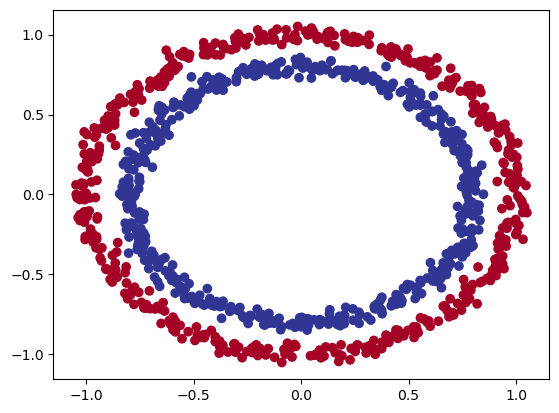

In [63]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu')

In [64]:
X,y=torch.from_numpy(X).type(torch.float),torch.from_numpy(y).type(torch.float)
print(type(X))

<class 'torch.Tensor'>


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [66]:
def sigmoid(x): 
    return 1/(1+np.exp(-x))

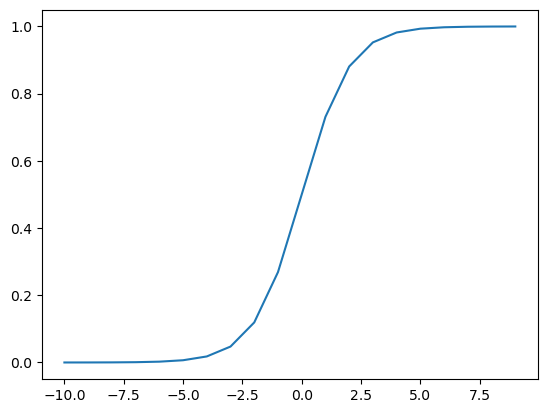

In [67]:
demo_x=range(-10,10)
demo_y=[sigmoid(val) for val in demo_x]
plt.plot(demo_x,demo_y)

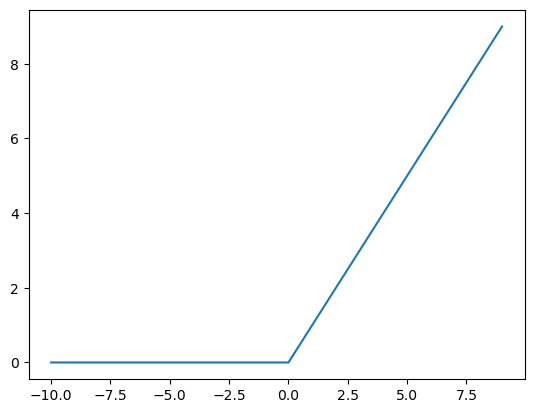

In [68]:
def Relu(x): 
    if x<=0:
        return 0 
    else :
        return x

demo_x=range(-10,10)
demo_y=[Relu(val) for val in demo_x]
plt.plot(demo_x,demo_y)

In [69]:
class CircleClassifer(nn.Module): 
    def __init__(self, input_features,output_features, hidden_features=10): 
        super().__init__()
        self.layer_1=nn.Linear(in_features=input_features,out_features=hidden_features)
        self.layer_2=nn.Linear(in_features=hidden_features,out_features=hidden_features)
        self.layer_3=nn.Linear(in_features=hidden_features,out_features=output_features)
        self.relu=nn.ReLU()

    def forward(self,x:torch.Tensor)-> torch.Tensor: 
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
        

In [70]:
model_1=CircleClassifer(input_features=2, output_features=1)
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.6634, -0.0833],
                      [-0.6998, -0.4744],
                      [-0.5711,  0.3475],
                      [-0.6820, -0.1502],
                      [ 0.4868, -0.4296],
                      [ 0.1047, -0.0746],
                      [-0.4836,  0.1306],
                      [-0.2269, -0.6205],
                      [ 0.5342, -0.2449],
                      [-0.5488,  0.2707]])),
             ('layer_1.bias',
              tensor([-0.0545, -0.2841,  0.4711,  0.3706, -0.6784, -0.0751, -0.4004, -0.5370,
                      -0.6257, -0.5770])),
             ('layer_2.weight',
              tensor([[ 0.1448, -0.0020,  0.2059, -0.1384, -0.0845, -0.0559, -0.1241, -0.2675,
                       -0.0441, -0.0051],
                      [-0.2101,  0.1450,  0.0089,  0.1584, -0.1334,  0.1713,  0.3135,  0.0662,
                        0.2098, -0.2172],
                      [ 0.0672, -0.2678, -0.0276, -0.0876, -0.2918, -0.2

In [71]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [72]:
if torch.cuda.is_available():
    device='cuda'
elif torch.backends.mps.is_available(): 
    device=torch.device("mps")
else:
    device="cpu"

print(f"using device ={device}")

using device =cuda


In [73]:
model_1.to(device)


CircleClassifer(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [74]:
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [ ]:

epochs=10000
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

trainLossList=[]
testLossList=[]
for epoch in range(epochs):
    model_1.train()

    y_logits=model_1(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))

    # 2 . copute loss 
    loss =loss_fn(y_logits,y_train)

    # 3. ZEro grad optimer 
    optimizer.zero_grad()

    acc=accuracy_score(y_true=y_train.cpu().detach().numpy(),y_pred=y_preds.cpu().detach().numpy())

    #4. Backpropagate Loss 
    loss.backward()

    #5. step the optimizer
    optimizer.step()

    # Testing 
    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_score(y_test.cpu().detach().numpy(),test_preds.cpu().detach().numpy())

    if epoch%10 ==0 : 
        print(f" epoch: {epoch}| trian loss : {loss:.5f} | test_loss : {test_loss} ,| test acc { test_acc*100} | Test loss {test_loss:.5f}" )

    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())


 epoch: 0| trian loss : 0.69291 | test_loss : 0.695236325263977 ,| test acc 40.5 | Test loss 0.69524
 epoch: 10| trian loss : 0.69253 | test_loss : 0.6948321461677551 ,| test acc 42.5 | Test loss 0.69483
 epoch: 20| trian loss : 0.69222 | test_loss : 0.69453364610672 ,| test acc 44.0 | Test loss 0.69453
 epoch: 30| trian loss : 0.69195 | test_loss : 0.694284200668335 ,| test acc 46.5 | Test loss 0.69428
 epoch: 40| trian loss : 0.69170 | test_loss : 0.6940667033195496 ,| test acc 46.5 | Test loss 0.69407
 epoch: 50| trian loss : 0.69147 | test_loss : 0.6938787698745728 ,| test acc 48.0 | Test loss 0.69388
 epoch: 60| trian loss : 0.69125 | test_loss : 0.6937086582183838 ,| test acc 49.0 | Test loss 0.69371
 epoch: 70| trian loss : 0.69104 | test_loss : 0.6935522556304932 ,| test acc 49.0 | Test loss 0.69355
 epoch: 80| trian loss : 0.69083 | test_loss : 0.6934065818786621 ,| test acc 48.5 | Test loss 0.69341
 epoch: 90| trian loss : 0.69063 | test_loss : 0.6932659149169922 ,| test acc 

In [ ]:
import matplotlib.pyplot as plt

# Plot training and test loss values
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), trainLossList, label='Train Loss', color='blue', linewidth=2)
plt.plot(range(epochs),testLossList, label='Test Loss', color='orange', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Test Loss over Epochs', fontsize=16)
plt.legend(fontsize=12)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()